# Singapore Retail Services and Connectivity

### IBM Data Science Capstone Project

The paper seeks to provide a basic framework for interested parties to set up a retail services business chain in Singapore while leveraging the locations of various Mass Rapid Transit MRT (Rail/Train/Metro/Subway) Station Exits

# Introduction

With a population of around 5.7 million people in 2019 and a land area of approximately 720 square kilometers, Singapore is the second most densely populated country in the world, after Monaco. This is not expected to ease in the near future, with the population of Singapore estimated to grow to 6.52 million people in 2035. (https://www.statista.com/statistics/778525/singapore-population-density/) Car ownership in Singapore is approximately 11% with about 640 thousand private cars in Singapore. There are about 140 thousand motorcycles.(https://www.budgetdirect.com.sg/car-insurance/research/car-ownership-singapore) It could be inferred that at least 60% of the population commute by public transport with average daily ridership of more than 3.5 million in 2019. The availability of disposable incomes of the average population and the consumption trends of take away food orders, procurement of essential services like grooming, laundry, repair, tailoring, procurement of daily household products in smaller quantities, pharmaceutical items, dental and healthcare services on the go has all increased the need for retail locations to be located at close proximity of the daily commuting routes. 
    
As of January 2020, the Singapore MRT network encompasses 203 kilometres with 122 stations in operation, spread across six lines. The network is expected to double to a total length of almost 400 kilometres by 2040 as a result of ongoing expansion works to its six existing lines and the construction of three new lines. (https://en.wikipedia.org/wiki/Mass_Rapid_Transit_(Singapore)#cite_note-16) Although the recent covid situation has decreased the demand for commuting within Singapore in the short term, the long term trend of the governmental policy to further enhance the public transportation infrastructure in a bid to decrease private car ownership is likely to not change. 

Any interested parties that is a business conglomerate that is looking to enter the retail market in Singapore and/or existing retail chain store owner that is seeking to further extend the retail presence in Singapore should definitively not overlook the need to have a retail chain store presence at the locations of the various MRT stations which are often the locations of major bus interchanges and shopping malls. For example, Japan’s largest train operator East Japan Railway Company shall open retail shops in 27 of the 32 stations of a new MRT line in Singapore. (https://www.todayonline.com/singapore/japans-largest-train-operator-open-shops-thomson-east-coast-line-stations Sept 2019) The need to analyse the retail services landscape of the areas that are in close proximity of MRT stations is an interesting business proposal that could be further enhanced with data.

The purpose of this project is to provide a basic framework for interested parties to work on and perform further analysis.

# Data


For the purposes of this project we can look at the a few data sets available online. Available data includes:

Data (1)\
Locations of the MRT stations exits in a geojson file (Singapore Land Transport Authority)\
https://data.gov.sg/dataset/lta-mrt-station-exit

Data (2)\
Locations and ratings data of retail services of the locations foe Station Exits that is returned by the FourSquare API\
https://developer.foursquare.com/

Data (3)\
Retail shop and event spaces available for tender/leasing (Singapore Mass Rapid Transit Corporation)\
https://www.smrt.com.sg/Our-Business/SMRT-Experience/SMRT-Properties/Leasing-Information#926716-shop-spaces-for-tender

Data (4)\
Retail median rentals by street name 2020 Q2 (Singapore Urban Redevelopment Authority)\
https://www.ura.gov.sg/-/media/Corporate/Property/Commercial-Properties-2020Q2/comm_median_rentals_2020Q2.pdf?la=en

The locations of the MRT station exits can be extracted into a dataframe. The location information of all the MRT station exits are inputs to which the Foursquare API shall extract all the available data of the locations and venue category of the various retail services of a limit of X number of venues within a radius of Y meters of the location.
      
Subsequently the data returned by the Foursquare API could be clustered and investigated for any trends and patterns that may exist. I suspect that there might be a lack of Foursquare data capture in Singapore. Hence this particular project may be like any other real life scenarios and problem statements which suffers from a lack of structured data. 

    
Another aspect of the project could also delve into the viability of the implementation of the business plan by considering the commercial data of the retail shop and event spaces available for tender/leasing by the facilities owner Singapore Mass Rapid Transit Corporation. We could also look into the available data of the retail median rentals by street name 2020 Q2. Further more in-depth and specific technical analysis could be performed on these raw commercial data that is available to potentially produce the cash flow projections of this new business plan.

One important aspect of the data science project is to obtain specific technical data from the persons/entities that might be interested in this project. We would need to collect the following data from the interested parties collectively named Factor(s):

Factor (A)\
Existing business structure and future intentions

Factor (B)\
Time frame and expectations of implementing the new business plans 

Factor (C)\
Budget and available resources

Factor (D)\
any specific exclusions and restrictions

The economic landscape of any highly urbanized and industrialized economies like Singapore shall ensue that only firms that possess certain comparative advantage in management and structural cost can sustain itself in the long term. Only the firms that enjoys certain economies of scale and scope can be a sustainable in this economic landscape.  There is a need to "price in" this sustainability factor when advising interested parties in this project. That is the main reason why collecting the specific technical data from the interested parties of this project is equally as important as collecting the raw commercial data and the relevant unstructured big data sets that is required for this project.

# Methodology

In [1]:
# main component of the report where you discuss and describe any exploratory data analysis that you did, 
# any inferential statistical testing that you performed, if any, and 
# what machine learnings were used and why.

Data 1)\
The location data of the MRT stations exits in a geojson file (Singapore Land Transport Authority) was downloaded. For a quick illustration purposes now the geojson file was read using the google geojson viewer http://geojsonviewer.nsspot.net/ and the image of the locations of the station exits are shown here:

<img src="https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/lta-mrt-station-exit-google-view.png"></img>  
<b>Public URL</b>:
<i>https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/lta-mrt-station-exit-google-view.png</i>\
I shall use the folium packages to generate and plot the geodata later on.

In [9]:
# The location data of the station exit to extracted from the geojson file using this code:

import json         # to load the geojson file
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df = pd.DataFrame(columns = ['Station Exit','Latitude','Longitude'])
df

,Station Exit,Latitude,Longitude


In [70]:
with open("lta-mrt-station-exit-geojson.geojson", 'r') as myfile:
    data1 = json.load(myfile)
    for feature in data1['features']:
        
        ##print(feature)
        # print(("{}, {}").format(feature['properties']['Name'], feature['geometry']['coordinates']))
        # output: kml_1, [103.870940604748, 1.33851065482785, 0.0]
        #         kml_2, [103.870508468118, 1.33858314970471, 0.0]
        # output is an object  
        
        N = [("{}").format(feature['properties']['Name'])]
        N_string = str(N)
        Number = N_string[6:]
        Number = Number[:-2]
        Number_int = int(Number)
        
        C = [("{}").format(feature['geometry']['coordinates'])]
        C_string = str(C)
        Lat = C_string[21:34]
        Lat_float  = float(Lat)
        Long  = C_string[3:16]
        Long_float = float(Long)
        
        data = [{'Station Exit':Number_int,'Latitude':Lat_float,'Longitude':Long_float}]
        df = df.append(data, ignore_index = True)
        
df.head

<bound method NDFrame.head of     Station Exit  Latitude   Longitude
0              1  1.338511  103.870941
1              2  1.338583  103.870508
2              3  1.319235  103.861904
3              4  1.331067  103.868704
4              5  1.331148  103.869333
..           ...       ...         ...
469          470  1.398284  103.881139
470          471  1.398159  103.881138
471          472  1.397200  103.889407
472          473  1.397133  103.889115
473          474  1.392026  103.880160

[474 rows x 3 columns]>

In [73]:
df=df.drop(df.index[[53,183,184,276,283,284,306,307,402,403,404,405]])
df.head()
# drops index rows
# code stop at 
# 55 (remove index 53) 
# 185 
# 278
# 285
# 308
# 404
# 406
# 457?

# df = df[:x]
# drop the x+1 th row onwards

,Station Exit,Latitude,Longitude
0,1,1.338511,103.870941
1,2,1.338583,103.870508
2,3,1.319235,103.861904
3,4,1.331067,103.868704
4,5,1.331148,103.869333


In [72]:
df.head

<bound method NDFrame.head of     Station Exit  Latitude   Longitude
0              1  1.338511  103.870941
1              2  1.338583  103.870508
2              3  1.319235  103.861904
3              4  1.331067  103.868704
4              5  1.331148  103.869333
..           ...       ...         ...
469          470  1.398284  103.881139
470          471  1.398159  103.881138
471          472  1.397200  103.889407
472          473  1.397133  103.889115
473          474  1.392026  103.880160

[462 rows x 3 columns]>

Some of the coding regarding the foursquare API and the clustering algothrim are referrenced from the last lab of week3 "DP0701EN-3-3-2-Neighborhoods-New-York-py-v1.0"

Data (2)\
The locations and ratings data of retail services available in Foursquare

In [17]:
# define foursquare credentials and version
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [7]:
Latitude_test0 = df.loc[0,'Latitude']
Longitude_test0 = df.loc[0,'Longitude']

In [8]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meters

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Latitude_test0,
    Longitude_test0,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=3DHBAEAZYJQJGGP035WQOI4KJIYYLJZCV0OEDONF3WIS0NJF&client_secret=USRA3PINKBVS0SMMN3VFS0K4E0XEJF4HGQUVAFNHI24NFDQL&v=20180605&ll=1.33851065482,103.870940604&radius=500&limit=50'

In [9]:
import requests
results = requests.get(url).json()

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,PUB Recreation Club,General Entertainment,1.340590,103.867247
1,Woodleigh MRT Station (NE11),Metro Station,1.338678,103.870510
2,Gym @ Singapore Power Club,Gym,1.338867,103.869344
3,Gym 8@Woodleigh,Gym,1.336173,103.869722
4,Park,Park,1.335541,103.869242
5,Singapore Power Club Training Field,Soccer Field,1.341431,103.868727


In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [13]:
# define new function

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station Exit', 
                  'Station Exit Latitude', 
                  'Station Exit Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
singapore_venues = getNearbyVenues(names=df['Station Exit'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
278
279
280
281

In [15]:
print(singapore_venues.shape)
singapore_venues.head(50)

(13235, 7)


,Station Exit,Station Exit Latitude,Station Exit Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,1.338511,103.870941,PUB Recreation Club,1.340590,103.867247,General Entertainment
1,1,1.338511,103.870941,Woodleigh MRT Station (NE11),1.338678,103.870510,Metro Station
2,1,1.338511,103.870941,Gym @ Singapore Power Club,1.338867,103.869344,Gym
3,1,1.338511,103.870941,Gym 8@Woodleigh,1.336173,103.869722,Gym
4,1,1.338511,103.870941,Park,1.335541,103.869242,Park
5,1,1.338511,103.870941,Singapore Power Club Training Field,1.341431,103.868727,Soccer Field
6,2,1.338583,103.870508,PUB Recreation Club,1.340590,103.867247,General Entertainment
7,2,1.338583,103.870508,Woodleigh MRT Station (NE11),1.338678,103.870510,Metro Station
8,2,1.338583,103.870508,Gym @ Singapore Power Club,1.338867,103.869344,Gym
9,2,1.338583,103.870508,Gym 8@Woodleigh,1.336173,103.869722,Gym


In [64]:
# download the dataframe "singapore_venues" into a csv file
singapore_venues.to_csv(r'station_exit_Foursquare_API_singapore_venues.csv', index = False)

In [16]:
singapore_venues.groupby('Station Exit').count()

,Station Exit Latitude,Station Exit Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Station Exit,,,,,,
1,6,6,6,6,6,6
2,6,6,6,6,6,6
3,27,27,27,27,27,27
4,36,36,36,36,36,36
5,22,22,22,22,22,22
...,...,...,...,...,...,...
470,8,8,8,8,8,8
471,8,8,8,8,8,8
472,9,9,9,9,9,9


In [62]:
print('There are {} uniques venue categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 323 uniques venue categories.


Analyze each Station Exit

In [18]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Station Exit column back to dataframe
singapore_onehot['Station Exit'] = singapore_venues['Station Exit'] 

# move Station Exit column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Station Exit,Accessories Store,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
singapore_onehot.shape

(13235, 324)

Grouping the rows by Station Exit and by taking the mean of the frequency of occurrence of each category

In [20]:
singapore_grouped = singapore_onehot.groupby('Station Exit').mean().reset_index()
singapore_grouped

,Station Exit,Accessories Store,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
singapore_grouped = singapore_onehot.groupby('Station Exit').mean().reset_index()
singapore_grouped

,Station Exit,Accessories Store,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's print each Station Exit's along with the top 5 most common venues

In [22]:
num_top_venues = 5


for hood in singapore_grouped['Station Exit']:
    print(hood)
    temp = singapore_grouped[singapore_grouped['Station Exit'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

1
                   venue  freq
0                    Gym  0.33
1  General Entertainment  0.17
2           Soccer Field  0.17
3          Metro Station  0.17
4                   Park  0.17


2
                   venue  freq
0                    Gym  0.33
1  General Entertainment  0.17
2           Soccer Field  0.17
3          Metro Station  0.17
4                   Park  0.17


3
                venue  freq
0        Noodle House  0.15
1  Chinese Restaurant  0.15
2          Soup Place  0.07
3  Seafood Restaurant  0.07
4         Coffee Shop  0.07


4
                  venue  freq
0    Chinese Restaurant  0.19
1  Fast Food Restaurant  0.08
2           Coffee Shop  0.08
3                Bakery  0.08
4            Food Court  0.06


5
                venue  freq
0  Chinese Restaurant  0.23
1         Coffee Shop  0.14
2        Noodle House  0.09
3          Food Court  0.09
4   Convenience Store  0.09


7
                venue  freq
0         Coffee Shop  0.11
1                Café  0.11
2     

In [23]:
# putting it into a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station Exit']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_exit_venues_sorted = pd.DataFrame(columns=columns)
station_exit_venues_sorted['Station Exit'] = singapore_grouped['Station Exit']

for ind in np.arange(singapore_grouped.shape[0]):
    station_exit_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

station_exit_venues_sorted.head()

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
1,2,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
2,3,Noodle House,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Soup Place,Bakery,Electronics Store,Dive Shop,Fried Chicken Joint,Fast Food Restaurant
3,4,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Food Court,Convenience Store,Snack Place,Photography Studio,Gas Station,Restaurant
4,5,Chinese Restaurant,Coffee Shop,Noodle House,Fast Food Restaurant,Food Court,Convenience Store,Ice Cream Shop,Market,Snack Place,Asian Restaurant


## Cluster the Station Exits into 5 clusters using k-means

In [25]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

singapore_grouped_clustering = singapore_grouped.drop('Station Exit', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 2, 2, 2, 1, 4, 4, 4, 4], dtype=int32)

In [26]:
# add clustering labels
station_exit_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

singapore_merged = df

# merge singapore_grouped with singapore_data to add latitude/longitude for each neighborhood
singapore_merged = singapore_merged.join(station_exit_venues_sorted.set_index('Station Exit'), on='Station Exit')

singapore_merged

,Station Exit,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1.338511,103.870941,4.0,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
1,2,1.338583,103.870508,4.0,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
2,3,1.319235,103.861904,2.0,Noodle House,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Soup Place,Bakery,Electronics Store,Dive Shop,Fried Chicken Joint,Fast Food Restaurant
3,4,1.331067,103.868704,2.0,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Food Court,Convenience Store,Snack Place,Photography Studio,Gas Station,Restaurant
4,5,1.331148,103.869333,2.0,Chinese Restaurant,Coffee Shop,Noodle House,Fast Food Restaurant,Food Court,Convenience Store,Ice Cream Shop,Market,Snack Place,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,1.398284,103.881139,2.0,Light Rail Station,Indian Restaurant,Park,Snack Place,Bridge,Supermarket,Food Court,Fish & Chips Shop,Exhibit,Farm
470,471,1.398159,103.881138,2.0,Light Rail Station,Indian Restaurant,Park,Snack Place,Bridge,Supermarket,Food Court,Fish & Chips Shop,Exhibit,Farm
471,472,1.397200,103.889407,1.0,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space
472,473,1.397133,103.889115,1.0,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space


In [45]:
# download the dataframe "station_exit_venues_sorted" into a csv file
singapore_merged.to_csv(r'station_exit_venues_k-means_clustered.csv', index = False)

In [27]:
#drop rows with null cluster label
singapore_no_null_clusters = singapore_merged.dropna(how='any',axis=0)
singapore_no_null_clusters

,Station Exit,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1.338511,103.870941,4.0,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
1,2,1.338583,103.870508,4.0,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
2,3,1.319235,103.861904,2.0,Noodle House,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Soup Place,Bakery,Electronics Store,Dive Shop,Fried Chicken Joint,Fast Food Restaurant
3,4,1.331067,103.868704,2.0,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Food Court,Convenience Store,Snack Place,Photography Studio,Gas Station,Restaurant
4,5,1.331148,103.869333,2.0,Chinese Restaurant,Coffee Shop,Noodle House,Fast Food Restaurant,Food Court,Convenience Store,Ice Cream Shop,Market,Snack Place,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,1.398284,103.881139,2.0,Light Rail Station,Indian Restaurant,Park,Snack Place,Bridge,Supermarket,Food Court,Fish & Chips Shop,Exhibit,Farm
470,471,1.398159,103.881138,2.0,Light Rail Station,Indian Restaurant,Park,Snack Place,Bridge,Supermarket,Food Court,Fish & Chips Shop,Exhibit,Farm
471,472,1.397200,103.889407,1.0,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space
472,473,1.397133,103.889115,1.0,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space


In [14]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
from folium.features import DivIcon

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [29]:
# create Stamen Toner map centred on singapore
address = 'Singapore'
geolocator = Nominatim(user_agent="ny_explorer")
map_location  = geolocator.geocode(address)
map_latitude  = map_location.latitude
map_longitude = map_location.longitude
print('The geograpical coordinates of the map centred on '+address+' are {}, {}.'.format(map_latitude, map_longitude))
map_clusters = folium.Map(location=[map_latitude, map_longitude], tiles='Stamen Toner', zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
       
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_no_null_clusters['Latitude'], singapore_no_null_clusters['Longitude'], singapore_no_null_clusters['Station Exit'], singapore_no_null_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

The geograpical coordinates of the map centred on Singapore are 1.2904753, 103.8520359.


Examine Clusters

In [30]:
# cluster 1
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 0, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,39,Supermarket,Bus Station,Coffee Shop,Basketball Court,Bakery,Park,Electronics Store,Food & Drink Shop,Food Court,Flea Market
48,49,Supermarket,Bus Station,Basketball Court,Food Court,Food & Drink Shop,Electronics Store,Bakery,Coffee Shop,Fish & Chips Shop,Farmers Market
143,144,Bus Station,Noodle House,Park,Building,Metro Station,Yunnan Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
144,145,Bus Station,Noodle House,Bus Stop,Building,Metro Station,Bookstore,Park,Yunnan Restaurant,Fast Food Restaurant,Field
150,151,Ski Area,Basketball Court,Gym,Deli / Bodega,Café,Bus Station,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant
151,152,Bus Station,Basketball Court,Gym,Deli / Bodega,Indonesian Restaurant,Café,Ski Area,Fish & Chips Shop,Farm,Farmers Market
152,153,Bus Station,Thai Restaurant,Outdoors & Recreation,Cafeteria,Yunnan Restaurant,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field
159,160,Supermarket,Bus Station,Coffee Shop,Basketball Court,Bakery,Park,Electronics Store,Food & Drink Shop,Food Court,Flea Market
231,232,Cosmetics Shop,Bus Station,French Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
232,233,Cosmetics Shop,Bus Station,French Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [31]:
# cluster 2
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 1, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,7,Café,Coffee Shop,Bus Station,Sandwich Place,Thai Restaurant,Italian Restaurant,Noodle House,Supermarket,Beer Bar,Korean Restaurant
13,14,Chinese Restaurant,Coffee Shop,Food Court,Fast Food Restaurant,Frozen Yogurt Shop,Shopping Mall,Malay Restaurant,Sandwich Place,Italian Restaurant,Bowling Alley
15,16,Coffee Shop,Chinese Restaurant,Food Court,Fast Food Restaurant,Italian Restaurant,Gift Shop,Sandwich Place,Malay Restaurant,Shopping Mall,Café
16,17,Coffee Shop,Food Court,Chinese Restaurant,Fast Food Restaurant,Frozen Yogurt Shop,Shopping Mall,Malay Restaurant,Sandwich Place,Italian Restaurant,Bowling Alley
20,21,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Coffee Shop,Café,Food Court,Bookstore,Massage Studio
...,...,...,...,...,...,...,...,...,...,...,...
463,464,Japanese Restaurant,Performing Arts Venue,Chinese Restaurant,Indian Restaurant,Food Court,Shopping Mall,Coffee Shop,Noodle House,Frozen Yogurt Shop,Kitchen Supply Store
466,467,Fast Food Restaurant,Coffee Shop,Steakhouse,Shopping Mall,Noodle House,Sculpture Garden,Chinese Restaurant,Restaurant,Sushi Restaurant,Bakery
471,472,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space
472,473,Bridge,Bus Line,Gym,Gym / Fitness Center,Trail,Fast Food Restaurant,Beer Garden,Pool,Hockey Arena,Event Space


In [32]:
# cluster 2 - showing 60 rows for further visual inpection
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 1, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]].head(60)

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,7,Café,Coffee Shop,Bus Station,Sandwich Place,Thai Restaurant,Italian Restaurant,Noodle House,Supermarket,Beer Bar,Korean Restaurant
13,14,Chinese Restaurant,Coffee Shop,Food Court,Fast Food Restaurant,Frozen Yogurt Shop,Shopping Mall,Malay Restaurant,Sandwich Place,Italian Restaurant,Bowling Alley
15,16,Coffee Shop,Chinese Restaurant,Food Court,Fast Food Restaurant,Italian Restaurant,Gift Shop,Sandwich Place,Malay Restaurant,Shopping Mall,Café
16,17,Coffee Shop,Food Court,Chinese Restaurant,Fast Food Restaurant,Frozen Yogurt Shop,Shopping Mall,Malay Restaurant,Sandwich Place,Italian Restaurant,Bowling Alley
20,21,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Coffee Shop,Café,Food Court,Bookstore,Massage Studio
21,22,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Coffee Shop,Café,Sushi Restaurant,Cha Chaan Teng,Bookstore
22,23,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Coffee Shop,Dessert Shop,Café,Food Court,Bookstore,Fried Chicken Joint
23,24,Convenience Store,Snack Place,Supermarket,Vegetarian / Vegan Restaurant,Filipino Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant
24,25,Convenience Store,Snack Place,Supermarket,Vegetarian / Vegan Restaurant,Filipino Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant
29,30,Food Court,Grocery Store,Coffee Shop,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Pet Store,Music Store,Japanese Restaurant,Paintball Field


In [33]:
# cluster 3
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 2, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,Noodle House,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Soup Place,Bakery,Electronics Store,Dive Shop,Fried Chicken Joint,Fast Food Restaurant
3,4,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Food Court,Convenience Store,Snack Place,Photography Studio,Gas Station,Restaurant
4,5,Chinese Restaurant,Coffee Shop,Noodle House,Fast Food Restaurant,Food Court,Convenience Store,Ice Cream Shop,Market,Snack Place,Asian Restaurant
17,18,Food Court,Chinese Restaurant,Coffee Shop,Flea Market,Vegetarian / Vegan Restaurant,Lake,Seafood Restaurant,Supermarket,Malay Restaurant,Steakhouse
18,19,Food Court,Chinese Restaurant,Coffee Shop,Flea Market,Vegetarian / Vegan Restaurant,Lake,Seafood Restaurant,Supermarket,Malay Restaurant,Steakhouse
...,...,...,...,...,...,...,...,...,...,...,...
464,465,Food Court,Café,Noodle House,Chinese Restaurant,Italian Restaurant,Skate Park,Stadium,Steakhouse,Seafood Restaurant,Grocery Store
467,468,Asian Restaurant,Hong Kong Restaurant,Coffee Shop,Pizza Place,Steakhouse,Café,Noodle House,Thai Restaurant,Food Court,Chinese Restaurant
468,469,Asian Restaurant,Hong Kong Restaurant,Coffee Shop,Pizza Place,Steakhouse,Café,Noodle House,Thai Restaurant,Food Court,Chinese Restaurant
469,470,Light Rail Station,Indian Restaurant,Park,Snack Place,Bridge,Supermarket,Food Court,Fish & Chips Shop,Exhibit,Farm


In [34]:
# cluster 4
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 3, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
393,394,Cafeteria,Yunnan Restaurant,French Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
394,395,Cafeteria,Yunnan Restaurant,French Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [35]:
# cluster 5
singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 4, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
1,2,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
7,8,Hotel,Japanese Restaurant,Coffee Shop,Movie Theater,Ice Cream Shop,Bookstore,Modern European Restaurant,Beer Bar,Café,Mobile Phone Shop
8,9,Hotel,Ice Cream Shop,Japanese Restaurant,Movie Theater,Bookstore,Coffee Shop,Restaurant,Beer Bar,Café,Gastropub
9,10,Hotel,Café,Japanese Restaurant,Beer Bar,Karaoke Bar,Ice Cream Shop,Restaurant,Bookstore,Coffee Shop,Movie Theater
...,...,...,...,...,...,...,...,...,...,...,...
435,436,Gun Range,English Restaurant,Escape Room,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
439,440,Soccer Field,Light Rail Station,Beer Garden,Beer Bar,Sporting Goods Shop,Farm,Chinese Restaurant,Bar,Harbor / Marina,Steakhouse
440,441,Soccer Field,Beer Garden,Beer Bar,Sporting Goods Shop,Farm,Chinese Restaurant,Bar,Harbor / Marina,Steakhouse,Club House
445,446,Palace,Music Venue,High School,Asian Restaurant,Yunnan Restaurant,Filipino Restaurant,Event Space,Exhibit,Farm,Farmers Market


In [36]:
# cluster 5 - showing 60 rows for further visual inspection
(singapore_no_null_clusters.loc[singapore_no_null_clusters['Cluster Labels'] == 4, singapore_no_null_clusters.columns[[0] + list(range(4, singapore_no_null_clusters.shape[1]))]]).head(60)

,Station Exit,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
1,2,Gym,Soccer Field,Metro Station,General Entertainment,Park,Yunnan Restaurant,Field,Event Space,Exhibit,Farm
7,8,Hotel,Japanese Restaurant,Coffee Shop,Movie Theater,Ice Cream Shop,Bookstore,Modern European Restaurant,Beer Bar,Café,Mobile Phone Shop
8,9,Hotel,Ice Cream Shop,Japanese Restaurant,Movie Theater,Bookstore,Coffee Shop,Restaurant,Beer Bar,Café,Gastropub
9,10,Hotel,Café,Japanese Restaurant,Beer Bar,Karaoke Bar,Ice Cream Shop,Restaurant,Bookstore,Coffee Shop,Movie Theater
10,11,Hotel,Japanese Restaurant,Beer Bar,Café,Karaoke Bar,Ice Cream Shop,Coffee Shop,Restaurant,Bookstore,Tea Room
11,12,Hotel,Japanese Restaurant,Coffee Shop,Bookstore,Restaurant,Ice Cream Shop,Beer Bar,Karaoke Bar,Café,Bubble Tea Shop
12,13,Hotel,Chinese Restaurant,Event Space,Clothing Store,Dumpling Restaurant,Bakery,Japanese Restaurant,Shopping Mall,Buffet,Café
14,15,Hostel,Chinese Restaurant,Food Court,Hotel,Spa,Noodle House,BBQ Joint,Buddhist Temple,Dessert Shop,Seafood Restaurant
42,43,Clothing Store,Chinese Restaurant,Multiplex,Toy / Game Store,German Restaurant,Department Store,Bakery,Shoe Store,Japanese Restaurant,Sporting Goods Shop


In [60]:
venue_count = singapore_no_null_clusters
venue_count = venue_count.drop(['Station Exit','Latitude', 'Longitude'], axis=1)
venue_count = venue_count.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#transpose it to plot a bar chart
cluster_venue_count = venue_count.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cluster_venue_count = cluster_venue_count.fillna(0).astype(int).reset_index(drop=True)
cluster_venue_count.head()

1st Most Common Venue,Airport Lounge,Asian Restaurant,Bakery,Basketball Court,Boat or Ferry,Border Crossing,Boutique,Bridge,Burger Joint,Bus Line,...,Ski Area,Soccer Field,Stadium,Supermarket,Sushi Restaurant,Thai Restaurant,Toy / Game Store,Trail,Train Station,Wings Joint
0,0,0,0,2,0,0,0,0,0,2,...,1,0,0,4,0,0,0,0,0,0
1,1,14,6,0,0,1,0,2,0,0,...,0,0,0,6,0,0,0,1,0,1
2,0,3,1,0,0,0,0,0,0,1,...,0,2,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,4,0,1,0,3,0,2,0,...,0,2,2,0,1,0,4,0,0,0


In [46]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


Text(0.5, 0, 'Clusters')

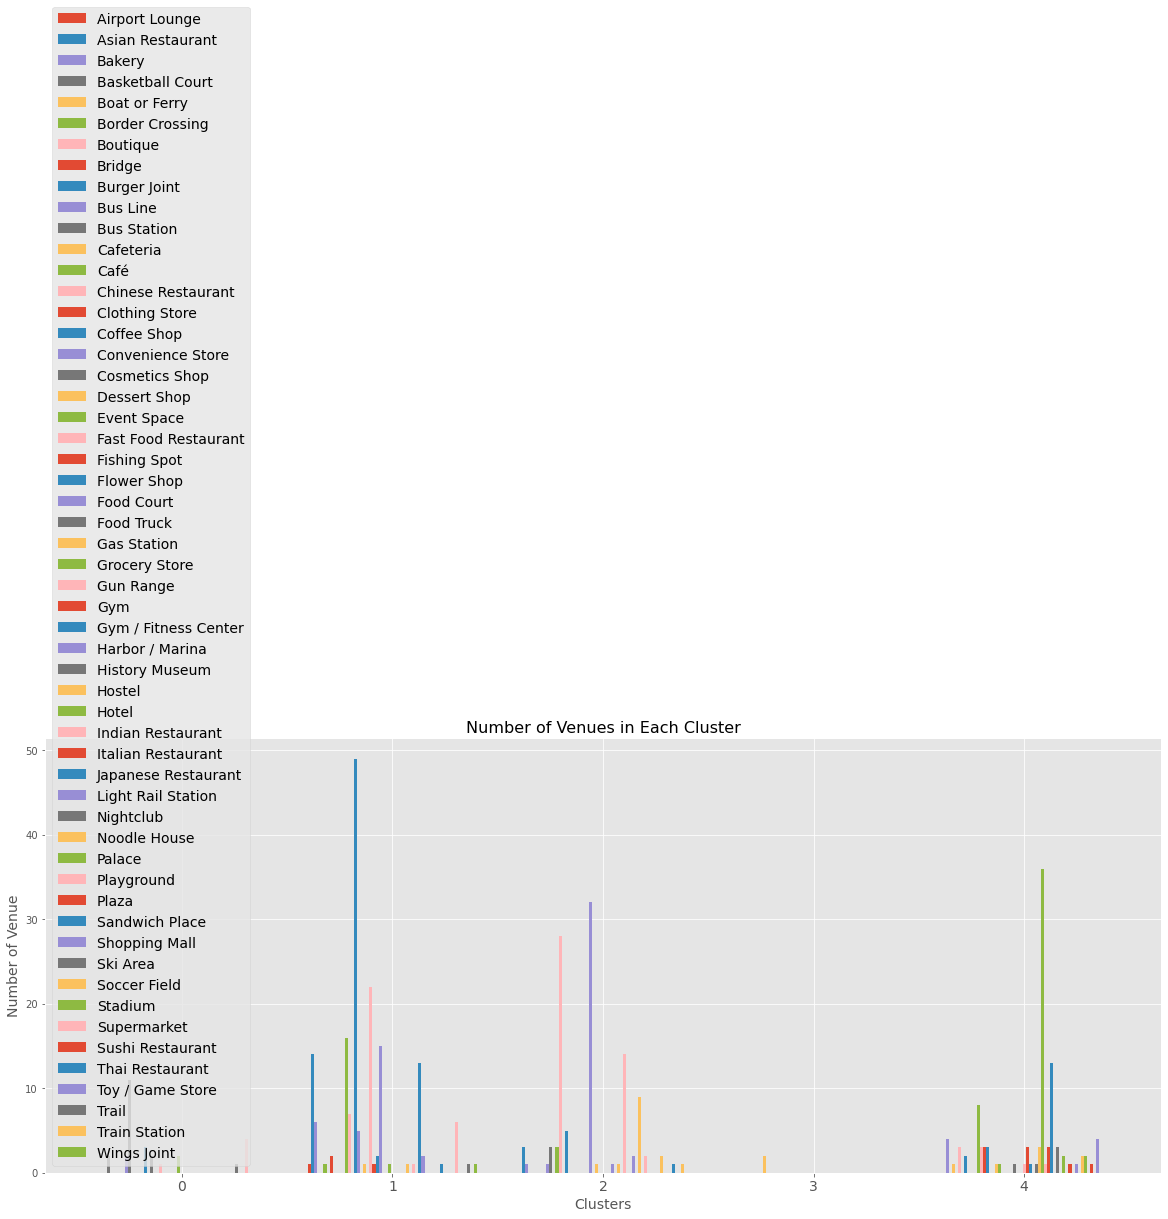

In [61]:
#plot a bar chart on the number of venues of each cluster

chart=cluster_venue_count.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cluster_venue_count.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Venue', fontsize=14)
plt.xlabel('Clusters', fontsize=14)


# Results

The unsupervised Machine Learning K-Means clustering is depolyed above. A total of 462 MRT Station Exits are clustered according to the most comon venue types. There are a total of 462-417 = 46 locations that are not clustered. The number of unique venue categories of 323 returned by 416 clustered locatons are simply too many to be effectively represented in any visual display.

The map above showed a nice spread of the locations accross the country due to the selection of the locations to be the MRT Station Exits. I observed that the ehe clusters produced by the K-Means algorithim is different everytime even though the inputs might be the same. For purposes of this project we stick to using an sensible arbitrary number of K = 5 clusters and observe the algorithim producing slightly different clusters each time. Furtheremore I can only guess that the "unique" venue categories of 326 looks to be too large a number and it seems to me that the venues are not effectively classified into venue categories in Foursquare due to various commercial and technical reasons.

We shall not dwell on the more technical approaches to the selecton of the optimal K, naming the various clusters etc in this project. However we shall utilize other more commercially available data and approaches to discuss the results.The most consistant culster is the Singapore city centre area in the culster above and indicated in the map below (Purple). 

An interesting fact I also observed that the K-Means algorithim sometimes also clustered locations in the culturally rich little india and culturally diverse arab street areas where there could be a specific group of consumers that are drawn to this area specifically. This is represented by the (Blue) locations circled (Pink) in the map image below. It does seem that the city fringe areas also consistently form a cluster.

<img src="https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/Singapore%20462%20MRT%20Station%20Exit%20-%20Foursquare%20API%20Venues%20-%20Little%20India.jpg"></img>  
<b>Public URL</b>:
<i>https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/Singapore%20462%20MRT%20Station%20Exit%20-%20Foursquare%20API%20Venues%20-%20Little%20India.jpg</i>

# Methodology

This phenomenon is inline with the Singapore Urban Development Authority (URA) planning areas where the city centre and the city fringe districts are specially clustered and focused on.

<img src="https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/URA_map_central_region.PNG"></img> 
<b>Public URL</b>:
<i>https://spring.ura.gov.sg/lad/ore/login/map_central_region.pdf</i>




We now explore other datasets that might be useful for the project for example: 

Data (3)\
Retail shop and event spaces available for tender/leasing (Singapore Mass Rapid Transit Corporation)

Data (4)\
Retail median rentals by street name 2020 Q2 (Singapore Urban Redevelopment Authority) 
This data set shows the latest 2nd quarter 2020 Median Rental prices of Retail shops in SGD per square meter per (psm) month. We shall start with Data (4) where we plot the locations of the median rent by street name onto the Singapore map.

Data (4) is downloaded from the Singapore Urban Redevelopment Authority
https://www.ura.gov.sg/-/media/Corporate/Property/Commercial-Properties-2020Q2/comm_median_rentals_2020Q2.pdf?la=en
The multipage pdf file is downloaded and converted into an excel file with mutliple sheets and the excel file is available below:

In [10]:
url_multipage_excel = 'https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/comm_median_rentals_2020Q2.xlsx'

df1 = pd.concat(pd.read_excel(url_multipage_excel, sheet_name=None), ignore_index=True)
# to remove additional column names, null values and other exclusions in the rows due to the concat of multiple pages

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [78]:
df1

,"Office and Retail Rentals by Street, 2Q20*",Unnamed: 1,Unnamed: 2
0,Median Rent ($ psm* per month),NaN,NaN
1,Street,Retail#,Office
2,AIRPORT BOULEVARD,275.48,.
3,ALBERT STREET,.,51.55
4,ALEXANDRA ROAD,116.33,67.81
...,...,...,...
145,YISHUN AVENUE 2,343.65,.
146,YISHUN AVENUE 9,83.33,.
147,* The above figures are for streets with at le...,NaN,NaN
148,"** To convert from $ psm to $ psf, divide by a...",NaN,NaN


In [11]:
# adding new columns for Latitude and Longitude with default values of 1.23
df1.insert(3, 'Latitude',   0.0)
df1.insert(4, 'Longitude', 0.0)
df1
#df=df.drop(['Latitude', 'Longitutde'], axis=1)

,"Office and Retail Rentals by Street, 2Q20*",Unnamed: 1,Unnamed: 2,Latitude,Longitude
0,Median Rent ($ psm* per month),NaN,NaN,0.0,0.0
1,Street,Retail#,Office,0.0,0.0
2,AIRPORT BOULEVARD,275.48,.,0.0,0.0
3,ALBERT STREET,.,51.55,0.0,0.0
4,ALEXANDRA ROAD,116.33,67.81,0.0,0.0
...,...,...,...,...,...
145,YISHUN AVENUE 2,343.65,.,0.0,0.0
146,YISHUN AVENUE 9,83.33,.,0.0,0.0
147,* The above figures are for streets with at le...,NaN,NaN,0.0,0.0
148,"** To convert from $ psm to $ psf, divide by a...",NaN,NaN,0.0,0.0


In [15]:
# create Stamen Toner map centred on singapore
address_input = 'Japan Rail Cafe'
address = address_input+' Singapore'

geolocator = Nominatim(user_agent="ny_explorer")
map_location  = geolocator.geocode(address)
map_latitude  = map_location.latitude
map_longitude = map_location.longitude

print('The geograpical coordinates of the map centred on '+address+' are {}, {}.'.format(map_latitude, map_longitude))
map2 = folium.Map(location=[map_latitude, map_longitude], tiles='Stamen Toner', zoom_start=12)

label = folium.Popup(address, parse_html=True)
folium.CircleMarker(
    [map_latitude, map_longitude],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7
).add_to(map2)

folium.map.Marker(
    [map_latitude, map_longitude],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html=f"""<div style="font-size: 20pt; font-family: courier new; color:violet; font-weight:bold">%s</div>""" % address,
        )
    ).add_to(map2)

folium.Marker(
    [map_latitude, map_longitude], 
    popup='<div style="font-size: 12pt">%s</div>' % address,
    icon=folium.Icon(color='blue')
    ).add_to(map2)

# import all the locations of the "Street" that have a Retail Median Rental price into dataframe and plotted on the map
import math
for x in range(len(df1.index)):
    if ((df1.iloc[x,1] != 'Retail# ') and (str(df1.iloc[x,1]) != '. ')):   # exclusions
        if (math.isnan(df1.iloc[x,1]) == False):   # check for NULL and nan variables 
            address_input = df1.iloc[x,0]          # find the lat and long of the address     
            address = address_input+'Singapore'
            geolocator = Nominatim(user_agent="ny_explorer")
            map_location  = geolocator.geocode(address)
            df1.iloc[x,3] = map_location.latitude      # insert loc data into df1
            df1.iloc[x,4] = map_location.longitude     # insert loc data into df1
            for lat, lon, location, variable in zip(df1['Latitude'], df1['Longitude'], df1['Office and Retail Rentals by Street, 2Q20* '], df1['Unnamed: 1']):
                folium.map.Marker(
                    [lat, lon],
                    icon=DivIcon(
                    icon_size=(150,36),
                    icon_anchor=(0,0),
                    #html='<div style="font-size: 12pt">%s</div>' % address,
                    html=f"""<div style="font-size: 12pt; font-family: calibri; color:red; font-weight:bold;">%s</div>""" % str(variable),
                    )
                ).add_to(map2)
map2             

In [16]:
#the location data of plotted in the folium map above
df1.head(60)

,"Office and Retail Rentals by Street, 2Q20*",Unnamed: 1,Unnamed: 2,Latitude,Longitude
0,Median Rent ($ psm* per month),NaN,NaN,0.000000,0.000000
1,Street,Retail#,Office,0.000000,0.000000
2,AIRPORT BOULEVARD,275.48,.,1.358623,103.989130
3,ALBERT STREET,.,51.55,0.000000,0.000000
4,ALEXANDRA ROAD,116.33,67.81,1.283903,103.801557
5,ANG MO KIO AVENUE 3,282.89,.,1.368850,103.846892
6,ANSON ROAD,78.05,65.12,1.276629,103.847247
7,BALESTIER ROAD,41.18,34.03,1.318559,103.854765
8,BATTERY ROAD,.,129.16,0.000000,0.000000
9,BAYFRONT AVENUE,228.24,.,1.280999,103.858542


An close up image of the folium map above is shown below as it takes too long to load the folium map\
Red figures are the 2020 Q2 Median Rentail for Retail for per square meter (psm) per month by location is:
<img src="https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/Japan%20Rail%20Cafe%20Singapore.PNG"></img>  

<b>Public URL</b>:
<i>https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/Japan%20Rail%20Cafe%20Singapore.PNG.jpg</i>\

The map is centred on the cafe in Singapore by the East Japan Railway Company\
Japan Rail Cafe (Blue Marker)\
https://www.guocotower.com/a-rail-taste-of-japan/ \
situatiuated in the the heart of the Singapore Downtown Tanjang Pagar area

Japan’s largest train operator East Japan Railway Company (JR East) is reortedly to be opening retail shops in 27 of the 32 stations on the future Singapore railway line.

Another redention of the 2020 Q2 Median Rentail for Retail for per square meter (psm) per month by location is:
<img src="https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/comm_median_rentals_2020Q2.PNG"></img>  

<b>Public URL</b>:
<i>https://stations.s3.jp-tok.cloud-object-storage.appdomain.cloud/comm_median_rentals_2020Q2.PNG</i>

# Discussion

In [76]:
# observations you noted and any recommendations you can make based on the results

The Data provided by the rail operator Singapore Mass Rapid Transit Corporation quoted in Data (3) are more commercial in nature. The listed infomation in the website for the leasing and rental of the real estate at the vicinity of the Station Exits may not be complete and many terms and conditions are also not available online. Hence any data analysis performed on the data may not be meaningful at this point in time. However data should be collated for references includes the legal terms and conditions of the leasing/rental contract of the retail space, the types and the viability/turnover of other retail services in the vicinity and the current and future developments of the surrounding areas. 

After the exploratory data analysis is performed on the earlier Datasets (1) and (2) utilizing the Foursquare API, one may suspect that any conclusion may be insufficient to initiate a business proposal. Furthermore I suspect that the Foursquare may not widely used in Singapore now and the historical data captured from tourists and non residents and may not be reflective of the current residents of Singapore. Furthermore the old data is a reflection of past consumption patterns pre-covid. Consumer behavior forward from this black swan pandemic event that we are all facing now shall be vastly different. 

As I may have mentioned form the beginning of this project, the basis of this info paper is merely to provide a basic framework for interested parties that is keen to develop a retail services chain business in Singapore. The commercial pricing data provided by the Singapore Mass Rapid Transit Corporation and the Urban Redevelopment Authority on the median retail rental price together with the results returned by the earlier Datasets (1) and (2) shall provide the interested parties of this project some basic preferences of retail services preferred by the public and commercial pricing data by location to work on to plan the next move.

# Conclusion

Only an innovative and progressive strategy can increase the chances of business survival and sustainability in the highly urbanized and industrialized economy like Singapore.  The new business needs to have a plan to achieve a certain economies of scale and a progressive scope of retail services to the consumer. Only firms that possess certain comparative advantage in management and structural cost can sustain itself in the long term. 

For a consumer focused and retail business to work out in Singapore, there must be a plan to achieve a certain retail presence within the planned amount of time. Empirical observations has shown that a minimum of 12 to 15 strategically situated retail and distribution outlets is essential. Any firm that is keen to build a consumer retail business in Singapore must possess a clear and progressive business strategy for the city center and city fringes with the intention to work on the progressive coverage of the whole island of about 720 square kilometers. A good way to start the retail business coverage would be to work on the locations where there is railway access and human traffic. Hence the purpose of this basic information paper.

There is a need to "price in" the suitability and sustainability factors when advising interested parties in this project. That is the main reason why collecting the specific technical data from the interested parties of this project is equally as important as collecting the raw commercial data and the relevant unstructured big data sets that maybe required for this project.

#### Disclaimer

This information contained in the document has been prepared solely for informational and academic purposes and for the recipient only. The content, information, forecasts and opinions contained herein was obtained from the information provider, and the author give no warranty as to the accuracy, completeness or reliability of any such content, opinions, forecasts or information. No responsibility or liability can be accepted for any errors or omissions or for any loss resulting from the use of such information. Information and content may be updated, revised, deleted or modified without notice. Information should be deemed current as of the time of initial publication or as otherwise stated in the information without regard to the date on which information was accessed. 